In [19]:
import pandas as pd

# Load training data from CSV file
train_data_csv = pd.read_csv('fashion-mnist_train.csv')
train_labels = train_data_csv['label']
train_data = train_data_csv.drop(columns=['label']).values

# Load testing data from CSV file
test_data_csv = pd.read_csv('fashion-mnist_test.csv')
test_labels = test_data_csv['label']
test_data = test_data_csv.drop(columns=['label']).values


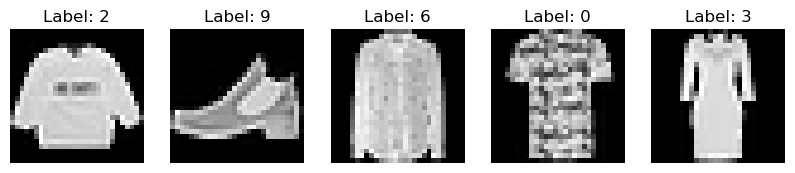

In [20]:
import matplotlib.pyplot as plt

# Function to display example images
def display_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i in range(num_images):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Label: {int(labels[i])}')
        axes[i].axis('off')
    plt.show()

# Display example images
display_images(train_data, train_labels)

In [21]:
import numpy as np

# Function to sample subsets of different sizes from the training split
def sample_subset(train_data, train_labels, size_percent):
    num_samples = int(train_data.shape[0] * size_percent)
    indices = np.random.choice(train_data.shape[0], num_samples, replace=False)
    return train_data[indices], train_labels[indices]

In [22]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function to train a classifier on each sampled subset
def train_classifier(train_data, train_labels, test_data, test_labels, num_components=50, neighbors=5):
    # Perform PCA
    pca = PCA(n_components=num_components)
    pca.fit(train_data)
    train_data_pca = pca.transform(train_data)
    test_data_pca = pca.transform(test_data)
    
    # Train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(train_data_pca, train_labels)
    
    # Predict on test set
    test_pred = knn.predict(test_data_pca)
    
    # Calculate accuracy
    accuracy = accuracy_score(test_labels, test_pred)
    
    return accuracy

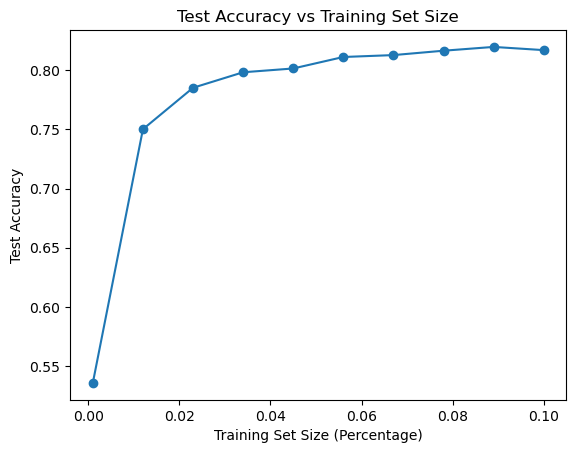

In [23]:
# Function to plot accuracy vs training set size
def plot_accuracy_vs_size(train_data, train_labels, test_data, test_labels, size_range=np.linspace(0.001, 0.1, 10)):
    accuracies = []
    for size_percent in size_range:
        # Sample subset
        subset_data, subset_labels = sample_subset(train_data, train_labels, size_percent)
        # Train classifier
        accuracy = train_classifier(subset_data, subset_labels, test_data, test_labels)
        accuracies.append(accuracy)
    
    plt.plot(size_range, accuracies, marker='o')
    plt.title('Test Accuracy vs Training Set Size')
    plt.xlabel('Training Set Size (Percentage)')
    plt.ylabel('Test Accuracy')
    plt.show()

# Plot accuracy vs training set size
plot_accuracy_vs_size(train_data, train_labels, test_data, test_labels)